In [1]:
import pandas as pd
import matplotlib.pylab as plt
from html import unescape
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import math
# crimes12a17 = pd.read_csv('/kaggle/input/bancodecrimes-2012a2017/BancoCrimesViolentos-Atualizado2012a2017.csv',encoding='latin1',sep=';')
# crimes18a23 = pd.read_csv('/kaggle/input/bancodecrimes-2018a2023/BancoCrimesViolentosAtualizadoSetembro2023.csv',encoding='latin1',sep=';')
# base = pd.read_excel('/kaggle/input/base-de-habitantes-atualizada/Base-Mg.xlsx')
crimes12a17 = pd.read_csv('./BancoCrimesViolentos-Atualizado2012a2017.csv',encoding='latin1',sep=';')
crimes18a23 = pd.read_csv('./BancoCrimesViolentosAtualizadoSetembro2023.csv',encoding='latin1',sep=';')
base = pd.read_excel('./Base-Mg.xlsx')

In [2]:

def decode_html(value):
    if isinstance(value, str):
        return unescape(value)
    else:
        pass
        return value

# Aplicar a função para todas as colunas
for coluna in base.columns:
    base[coluna] = base[coluna].apply(decode_html)

display(crimes12a17[:2])
display(crimes18a23[:2])
display(base[:2])





,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2012,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2012,7,7,NÃO


,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2018,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2018,7,7,NÃO


,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2020],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2020]
0,Abadia dos Dourados,3100104.0,abadiense,WANDERLEI LEMES SANTOS,880.461,6272.0,7.12,98.3,0.689,16.39,21894.89576,18793.52389,21962.98
1,Abaeté,3100203.0,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675.0,12.48,99.8,0.698,24.1,45220.32463,40774.21946,23905.96


    Import das bases  atualizadas 

In [3]:
# municipio crimes finais

dadosBrutos = pd.concat([crimes12a17,crimes18a23])

# dadosRegistro = dadosBrutos[dadosBrutos['Registros'] > 0] & dadosBrutos[dadosBrutos['Ano'] < '2023']
dadosRegistro = dadosBrutos[(dadosBrutos['Registros'] > 0) & (dadosBrutos['Ano'] < 2023)]
dadosRegistro = dadosRegistro.rename(columns={'Natureza': 'Quantia de crimes'})
municipioCrimes = dadosRegistro.groupby('Município')[['Quantia de crimes']].count()
municipioCrimesFinal = municipioCrimes.sort_values('Quantia de crimes',ascending=False)
display(dadosBrutos)


,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2012,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2012,7,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2012,12,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2012,12,12,NÃO
4,0,Estupro Consumado,ACUCENA,310050,1,2012,12,12,NÃO
...,...,...,...,...,...,...,...,...,...
765136,0,Homicídio Consumado (Registros),VIRGOLANDIA,317190,9,2023,8,8,NÃO
765137,1,Homicídio Consumado (Registros),VISCONDE DO RIO BRANCO,317200,9,2023,4,4,NÃO
765138,0,Homicídio Consumado (Registros),VOLTA GRANDE,317210,9,2023,4,4,NÃO
765139,0,Homicídio Consumado (Registros),WENCESLAU BRAZ,317220,9,2023,17,17,NÃO


In [4]:
axi = range(2012, 2019, 6)
for i, ano in enumerate(range(2017, 2024, 5)):
    print(f'Período de {axi[i]} até {ano}.')
    dadosRegistro = dadosBrutos[(dadosBrutos['Registros'] > 0) & (dadosBrutos['Ano'] >= axi[i]) & (dadosBrutos['Ano'] <= ano)]
    dadosRegistro = dadosRegistro.rename(columns={'Natureza': 'Quantia de crimes'})
    periodoCrimes = dadosRegistro.groupby('Município')[['Quantia de crimes']].count()
    periodoCrimesFinal = periodoCrimes.sort_values('Quantia de crimes', ascending=False)
    display(periodoCrimesFinal)



# criminalidade por tempo no estado

Período de 2012 até 2017.


,Quantia de crimes
Município,
BELO HORIZONTE,876
CONTAGEM,763
BETIM,658
JUIZ DE FORA,654
UBERLANDIA,616
...,...
DORESOPOLIS,2
ARACITABA,2
ANTONIO PRADO DE MINAS,2


Período de 2018 até 2022.


,Quantia de crimes
Município,
BELO HORIZONTE,677
CONTAGEM,567
UBERLANDIA,492
BETIM,490
RIBEIRAO DAS NEVES,462
...,...
WENCESLAU BRAZ,2
GRUPIARA,1
CARANAIBA,1


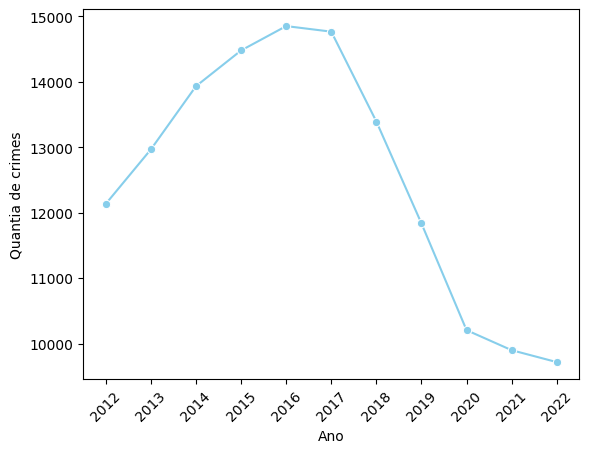

In [5]:
dadosRegistro = dadosBrutos[(dadosBrutos['Registros'] > 0) & (dadosBrutos['Ano'] < 2023)]
dadosRegistro = dadosRegistro.rename(columns={'Natureza': 'Quantia de crimes'})
tempoCrimes = dadosRegistro.groupby('Ano')[['Quantia de crimes']].count()
tempoCrimesFinal = tempoCrimes.sort_values('Ano',ascending=True)
# display(tempoCrimesFinal)

sns.lineplot(data=tempoCrimesFinal, x='Ano', y='Quantia de crimes', marker='o', color='skyblue')
plt.xticks(tempoCrimesFinal.index, rotation=45)
plt.show()



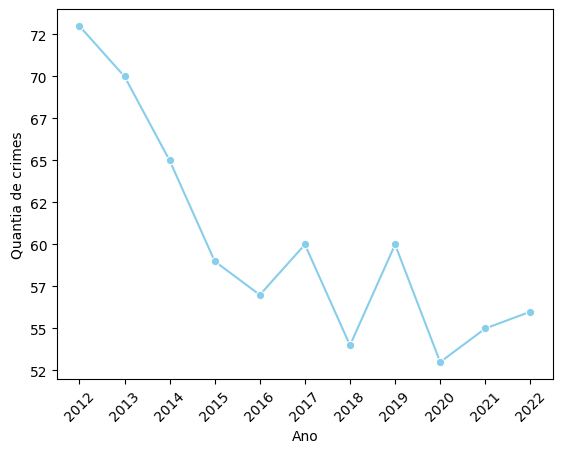

In [6]:

nome_do_municipio = "MURIAE"
filtradosMuriae = dadosRegistro.query('Município == @nome_do_municipio')
filtradosMuriae = filtradosMuriae.rename(columns={'Natureza': 'Quantia de crimes'})
agrupadosMuriae = filtradosMuriae.groupby('Ano')[['Quantia de crimes']].count().round(0).astype(int)

sns.lineplot(data=agrupadosMuriae, x='Ano', y='Quantia de crimes', marker='o', color='skyblue')
plt.xticks(agrupadosMuriae.index, rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

In [7]:
base = base.rename(columns={'Município [-]': 'Município','Código [-]':'Código','População residente - pessoas [2022]':'População residente - pessoas','Densidade demográfica - hab/km² [2022]':'Densidade demográfica - hab/km²','PIB per capita - R$ [2020]':'PIB per capita - R$'})

arrayColunasDrop =['Gentílico [-]','Prefeito [2021]','Área Territorial - km² [2022]','Escolarização <span>6 a 14 anos</span> - % [2010]','IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]','Mortalidade infantil - óbitos por mil nascidos vivos [2020]','Receitas realizadas - R$ (×1000) [2017]','Despesas empenhadas - R$ (×1000) [2017]']
baseHabitantes = base.drop(arrayColunasDrop,axis=1)
display(baseHabitantes[:2])



,Município,Código,População residente - pessoas,Densidade demográfica - hab/km²,PIB per capita - R$
0,Abadia dos Dourados,3100104.0,6272.0,7.12,21962.98
1,Abaeté,3100203.0,22675.0,12.48,23905.96


In [8]:
baseHabitantes['Município'] = baseHabitantes['Município'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
dadosBrutos['Município'] = dadosBrutos['Município'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Realize o merge
CrimesHabitantes = pd.merge(baseHabitantes, dadosBrutos, on='Município', how='outer')

display(CrimesHabitantes[:7])

,Município,Código,População residente - pessoas,Densidade demográfica - hab/km²,PIB per capita - R$,Registros,Natureza,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO
1,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro de Vulnerável Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO
2,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro de Vulnerável Tentado,310010.0,1.0,2012.0,10.0,10.0,NÃO
3,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro Tentado,310010.0,1.0,2012.0,10.0,10.0,NÃO
4,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Extorsão Mediante Sequestro Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO
5,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Homicídio Tentado,310010.0,1.0,2012.0,10.0,10.0,NÃO
6,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,1.0,Roubo Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO


In [9]:
CrimesHabitantesPorRequistro = CrimesHabitantes[(CrimesHabitantes['Registros'] > 0) & (CrimesHabitantes['Ano'] < 2023)]
CrimesHabitantesPorRequistro = CrimesHabitantesPorRequistro.rename(columns={'Natureza': 'Quantia de crimes'})
CrimesHabitantesFiltrados = CrimesHabitantesPorRequistro.groupby(['Município', 'População residente - pessoas'])[['Quantia de crimes']].count().reset_index()

CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =round(( CrimesHabitantesFiltrados['Quantia de crimes'] / CrimesHabitantesFiltrados['População residente - pessoas'])*1000,0).astype('int') 
# CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =int(((CrimesHabitantesFiltrados['Quantia de crimes'] / CrimesHabitantesFiltrados['População residente - pessoas'])*1000).round(0))
display(CrimesHabitantesFiltrados[:7])

,Município,População residente - pessoas,Quantia de crimes,Taxa de crimes por mil habitantes
0,ABADIA DOS DOURADOS,6272.0,92,15
1,ABAETE,22675.0,293,13
2,ACAIACA,3909.0,93,24
3,ACUCENA,8943.0,108,12
4,AGUA BOA,12589.0,202,16
5,AGUA COMPRIDA,2108.0,50,24
6,AGUANIL,4357.0,81,19


In [10]:
CrimesHabitantesFiltrados = CrimesHabitantesFiltrados.sort_values(by='Taxa de crimes por mil habitantes',ascending=False)
display(CrimesHabitantesFiltrados[:30])

,Município,População residente - pessoas,Quantia de crimes,Taxa de crimes por mil habitantes
428,LEANDRO FERREIRA,3199.0,106,33
514,NOVA PORTEIRINHA,6706.0,222,33
462,MATHIAS LOBATO,3038.0,100,33
191,CONCEICAO DO PARA,5415.0,173,32
574,PERIQUITO,6553.0,196,30
644,ROMARIA,3386.0,102,30
827,VERDELANDIA,7672.0,222,29
183,COMENDADOR GOMES,2773.0,79,28
109,CAJURI,4088.0,110,27
584,PIRAJUBA,5537.0,144,26


In [11]:
CrimesHabitantesFiltrados = CrimesHabitantesFiltrados.sort_values(by='Taxa de crimes por mil habitantes', ascending=False)

# Adicione uma coluna 'Classificacao' com a posição da cidade com base na taxa de crimes
CrimesHabitantesFiltrados['Classificacao'] = range(1, len(CrimesHabitantesFiltrados) + 1)
cidade_pesquisada = 'MURIAE'
linha_cidade_pesquisada = CrimesHabitantesFiltrados.loc[CrimesHabitantesFiltrados['Município'] == cidade_pesquisada ]
display(CrimesHabitantesFiltrados)
display(linha_cidade_pesquisada)

,Município,População residente - pessoas,Quantia de crimes,Taxa de crimes por mil habitantes,Classificacao
428,LEANDRO FERREIRA,3199.0,106,33,1
514,NOVA PORTEIRINHA,6706.0,222,33,2
462,MATHIAS LOBATO,3038.0,100,33,3
191,CONCEICAO DO PARA,5415.0,173,32,4
574,PERIQUITO,6553.0,196,30,5
...,...,...,...,...,...
775,SERRANOS,1990.0,3,2,837
766,SENHORA DOS REMEDIOS,10384.0,25,2,838
492,MONTES CLAROS,414240.0,943,2,839
188,CONCEICAO DAS PEDRAS,2772.0,3,1,840


,Município,População residente - pessoas,Quantia de crimes,Taxa de crimes por mil habitantes,Classificacao
498,MURIAE,104108.0,662,6,726


In [12]:
# calcular media

# Calcular a média de crimes violentos por habitante na cidade
media_crimes_cidade = linha_cidade_pesquisada["Quantia de crimes"].sum() / linha_cidade_pesquisada["População residente - pessoas"].sum()
display(media_crimes_cidade)

# Calcular a média de crimes violentos por habitante no estado
media_crimes_estado = CrimesHabitantesFiltrados["Quantia de crimes"].sum() / CrimesHabitantesFiltrados["População residente - pessoas"].sum()
display(media_crimes_estado) 

#converter em porcentagem
media_crimes_cidade_porcentagem = round((media_crimes_cidade * 100), 2)
media_crimes_estado_porcentagem = round((media_crimes_estado * 100), 2) 

# Comparar as médias
if media_crimes_cidade > media_crimes_estado:
    print("A média de crimes violentos por habitante na cidade é maior do que a média de crimes violentos por habitante no estado.")
    print("media da cidade: ({}%) e media do estado: ({}%).".format(media_crimes_cidade_porcentagem, media_crimes_estado_porcentagem))
else:
    print("A média de crimes violentos por habitante na cidade é menor do que a média de crimes violentos por habitante no estado.")
    print("media da cidade: ({}%) e media do estado: ({}%).".format(media_crimes_cidade_porcentagem, media_crimes_estado_porcentagem))


0.006358781265608791

0.006715603826184648

A média de crimes violentos por habitante na cidade é menor do que a média de crimes violentos por habitante no estado.
media da cidade: (0.64%) e media do estado: (0.67%).


In [13]:
CrimesHabitantesFiltrados = CrimesHabitantesPorRequistro.groupby(['Município', 'População residente - pessoas', 'Ano'])[['Quantia de crimes']].count().reset_index()
CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =round(( CrimesHabitantesFiltrados['Quantia de crimes'] / CrimesHabitantesFiltrados['População residente - pessoas'] * 1000), 2)
# CrimesHabitantesFiltrados['Classificacao'] = range(1, len(CrimesHabitantesFiltrados) + 1)

cidade_pesquisada = 'MURIAE'
linha_cidade_pesquisada = CrimesHabitantesFiltrados.loc[CrimesHabitantesFiltrados['Município'] == cidade_pesquisada ]

# sns.lineplot(data=linha_cidade_pesquisada, x='Ano', y='Taxa de crimes por mil habitantes', marker='o', color='skyblue')
# sns.lineplot(data=CrimesHabitantesFiltrados, x='Ano', y='Taxa de crimes por mil habitantes', marker='o', color='orange')
display(linha_cidade_pesquisada)
display(CrimesHabitantesFiltrados)
# plt.xticks(agrupadosMuriae.index, rotation=45)
# ax = plt.gca()
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: "%.2f" % x))
# plt.show()

,Município,População residente - pessoas,Ano,Quantia de crimes,Taxa de crimes por mil habitantes
5271,MURIAE,104108.0,2012.0,73,0.70
5272,MURIAE,104108.0,2013.0,70,0.67
5273,MURIAE,104108.0,2014.0,65,0.62
5274,MURIAE,104108.0,2015.0,59,0.57
5275,MURIAE,104108.0,2016.0,57,0.55
5276,MURIAE,104108.0,2017.0,60,0.58
5277,MURIAE,104108.0,2018.0,54,0.52
5278,MURIAE,104108.0,2019.0,60,0.58
5279,MURIAE,104108.0,2020.0,53,0.51
5280,MURIAE,104108.0,2021.0,55,0.53


,Município,População residente - pessoas,Ano,Quantia de crimes,Taxa de crimes por mil habitantes
0,ABADIA DOS DOURADOS,6272.0,2012.0,10,1.59
1,ABADIA DOS DOURADOS,6272.0,2013.0,8,1.28
2,ABADIA DOS DOURADOS,6272.0,2014.0,10,1.59
3,ABADIA DOS DOURADOS,6272.0,2015.0,7,1.12
4,ABADIA DOS DOURADOS,6272.0,2016.0,11,1.75
...,...,...,...,...,...
8874,WENCESLAU BRAZ,2356.0,2015.0,1,0.42
8875,WENCESLAU BRAZ,2356.0,2016.0,2,0.85
8876,WENCESLAU BRAZ,2356.0,2017.0,2,0.85
8877,WENCESLAU BRAZ,2356.0,2021.0,1,0.42


In [14]:
CrimesHabitantesFiltrados = CrimesHabitantesPorRequistro.groupby(['Município', 'População residente - pessoas'])[['Quantia de crimes']].count().reset_index()
CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =round(( CrimesHabitantesFiltrados['Quantia de crimes'] / CrimesHabitantesFiltrados['População residente - pessoas'])*1000,0).astype('int') 
media_taxa_crimes = round(CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'].mean(),0).astype('int') 
display("A media de crimes por mil habitantes em minas gerais no perios de 2012 a 2022 e de 11 crimes violentos para mil habitantes")
display(media_taxa_crimes)
#A media de crimes por mil habitantes em minas gerais no perios de 2012 a 2022 e de 11 crimes violentos para mil habitantes

cidade_pesquisada = 'MURIAE'
linha_cidade_pesquisada = CrimesHabitantesFiltrados.loc[CrimesHabitantesFiltrados['Município'] == cidade_pesquisada ]
#numero de crimes violentos po mil habitantes em muriae do periodo de 2012 a 2022 e de 6 crimes por mil habitantes, sendo quanse a metade da media do estado
crimes_muriae = round(linha_cidade_pesquisada['Taxa de crimes por mil habitantes'].mean(),0).astype('int') 
display("Numero de crimes violentos por mil habitantes em muriae do periodo de 2012 a 2022 e de 6 crimes por mil habitantes, sendo quanse a metade da media do estado")
display(crimes_muriae)

'A media de crimes por mil habitantes em minas gerais no perios de 2012 a 2022 e de 11 crimes violentos para mil habitantes'

11

'Numero de crimes violentos por mil habitantes em muriae do periodo de 2012 a 2022 e de 6 crimes por mil habitantes, sendo quanse a metade da media do estado'

6

In [15]:

# soma_total_por_mes = soma_por_natureza_ordenado.groupby('Mês').sum().reset_index()
# # Exibir as primeiras 24 linhas do DataFrame resultante
# display(soma_total_por_mes.head(24))
#soma_por_natureza = dadosBrutos.groupby(['Natureza', 'Município', 'Ano']).sum().reset_index()

# Se quiser remover a coluna 'RMBH', você pode usar drop como você fez antes



,Natureza,Município,Ano,Mês,Registros,Cod IBGE,RISP,RISP Nova,RMBH
0,Estupro Consumado,ABADIA DOS DOURADOS,2012,1,0,310010,10,10,NÃO
528328,Extorsão Consumado,IBIRACATU,2012,2,0,312965,11,11,NÃO
528327,Extorsão Consumado,IBIRACATU,2012,1,0,312965,11,11,NÃO
1365173,Sequestro e Cárcere Privado Consumado,FREI INOCENCIO,2012,12,0,312690,8,8,NÃO
1365172,Sequestro e Cárcere Privado Consumado,FREI INOCENCIO,2012,11,0,312690,8,8,NÃO
...,...,...,...,...,...,...,...,...,...
1228246,Roubo Tentado,CLARAVAL,2023,5,0,311640,18,18,NÃO
1228247,Roubo Tentado,CLARAVAL,2023,6,0,311640,18,18,NÃO
1228248,Roubo Tentado,CLARAVAL,2023,7,1,311640,18,18,NÃO
298066,Estupro de Vulnerável Consumado,JESUANIA,2023,2,0,313590,6,6,NÃO


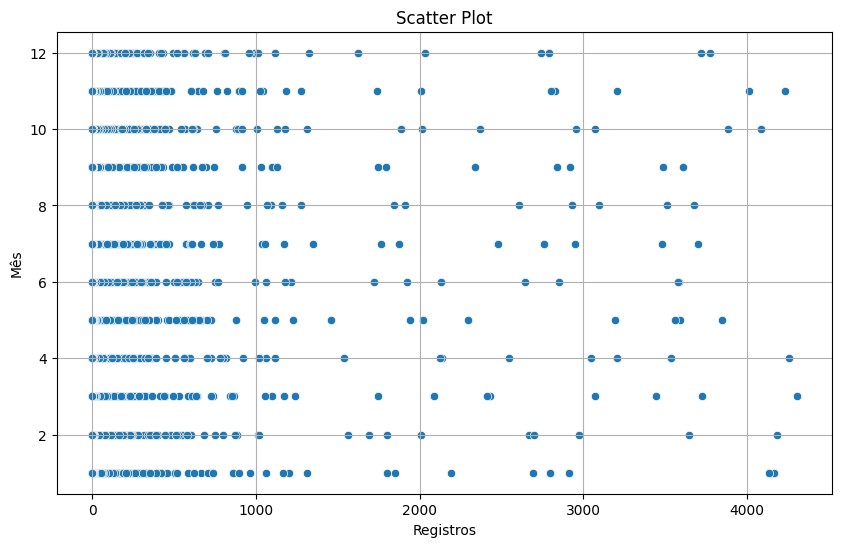

In [16]:

soma_por_natureza = dadosBrutos.groupby(['Natureza', 'Município','Ano','Mês']).sum().reset_index()
soma_por_natureza_ordenado = soma_por_natureza.sort_values(by='Ano', ascending=True)
display(soma_por_natureza_ordenado)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Registros', y='Mês', data=soma_por_natureza_ordenado, alpha=1)
plt.title('Scatter Plot')
plt.xlabel('Registros')
plt.ylabel('Mês')
plt.grid(True)
plt.show()
